In [98]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image as im
from tensorflow import keras
tfds.disable_progress_bar()

In [2]:
tfds.list_builders()


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [3]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\mahmo\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

In [4]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")


The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


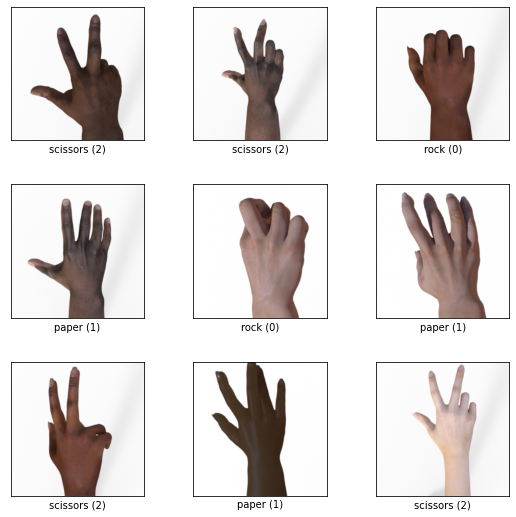

In [5]:
fig = tfds.show_examples(info, ds_train)


In [6]:

train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])


In [7]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [8]:

model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 12s 139ms/step - loss: 25.8890 - accuracy: 0.4353
Epoch 2/5
79/79 [==============================] - 11s 139ms/step - loss: 0.7622 - accuracy: 0.7409
Epoch 3/5
79/79 [==============================] - 11s 142ms/step - loss: 1.1194 - accuracy: 0.7000
Epoch 4/5
79/79 [==============================] - 12s 147ms/step - loss: 0.3770 - accuracy: 0.8599
Epoch 5/5
79/79 [==============================] - 11s 142ms/step - loss: 0.6437 - accuracy: 0.7873


In [9]:
model.evaluate(test_images, test_labels)


12/12 [==============================] - 0s 26ms/step - loss: 1.8771 - accuracy: 0.6210


[1.8770995140075684, 0.6209677457809448]

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(32,3,activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation="softmax")
])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 377s 5s/step - loss: 4.1533 - accuracy: 0.6825
Epoch 2/5
79/79 [==============================] - 386s 5s/step - loss: 0.1037 - accuracy: 0.9837
Epoch 3/5
79/79 [==============================] - 394s 5s/step - loss: 0.0098 - accuracy: 1.0000
Epoch 4/5
79/79 [==============================] - 387s 5s/step - loss: 0.0218 - accuracy: 0.9940
Epoch 5/5
79/79 [==============================] - 402s 5s/step - loss: 0.3526 - accuracy: 0.9448


In [11]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(32,3,activation="relu"),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 45s 559ms/step - loss: 0.8323 - accuracy: 0.7226
Epoch 2/5
79/79 [==============================] - 43s 547ms/step - loss: 0.0869 - accuracy: 0.9770
Epoch 3/5
79/79 [==============================] - 43s 551ms/step - loss: 0.0172 - accuracy: 0.9964
Epoch 4/5
79/79 [==============================] - 43s 549ms/step - loss: 0.0095 - accuracy: 0.9988
Epoch 5/5
79/79 [==============================] - 42s 538ms/step - loss: 0.0100 - accuracy: 0.9972


In [12]:
train_images[0].shape

(300, 300, 1)

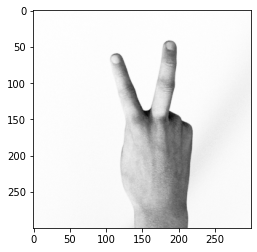

In [96]:
image9 = train_images[0].reshape(300,300)
image1 = test_images[0].reshape(300,300)
plt.imshow(image1, cmap="Greys_r")

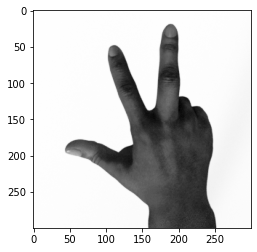

In [95]:
image2 = train_images[60].reshape(300,300)
plt.imshow(image, cmap="Greys_r")

(300, 300, 3)

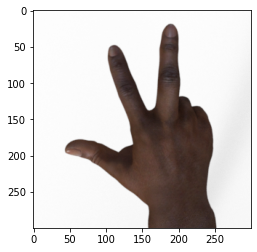

In [17]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]
plt.imshow(rgb_image)
rgb_image.shape

In [36]:
predictions = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, predictions, labels=[0, 1, 2])
clr = classification_report(test_labels, predictions, labels=[0, 1, 2], target_names=["Paper", "Rock", "Scissors"])



Classification Report:
----------------------
               precision    recall  f1-score   support

       Paper       0.99      0.76      0.86       124
        Rock       0.60      0.94      0.73       124
    Scissors       0.82      0.56      0.67       124

    accuracy                           0.75       372
   macro avg       0.81      0.75      0.75       372
weighted avg       0.81      0.75      0.75       372



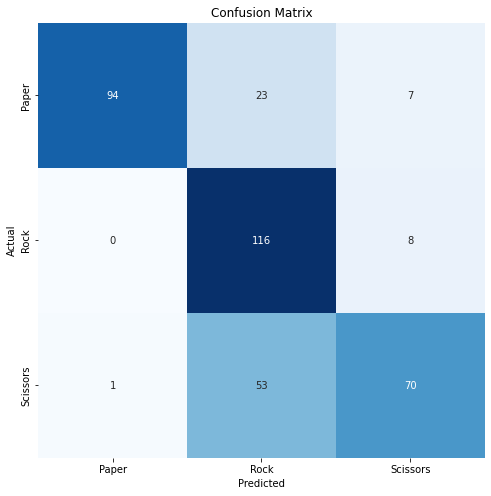

Classification Report:
----------------------
               precision    recall  f1-score   support

       Paper       0.99      0.76      0.86       124
        Rock       0.60      0.94      0.73       124
    Scissors       0.82      0.56      0.67       124

    accuracy                           0.75       372
   macro avg       0.81      0.75      0.75       372
weighted avg       0.81      0.75      0.75       372



In [37]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Paper", "Rock", "Scissors"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [92]:
def predictor(location):
    test_image=load_img(location,target_size=(300,300))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    if result[0][0] == 1:
        prediction = "It is a paper"
    elif result[0][1] == 1:
        prediction = "It is a rock"
    else:
        prediction ="It is a scissors"
    return prediction

In [101]:
#predictor(rgb_image)
'''print(test_images.shape)
tests_images =tf.image.resize(
    test_images, (300,300), preserve_aspect_ratio=False,
    antialias=False, name=None
)

testss_images = tf.reshape(
    , shape, name=None
)
tests_images.shape
#predictor(tests_images)

#test_image=image.load_img(test_labels[0],target_size=(372,300,300,1))
'''
#predictor(image1)
#test_image=im.load_img(image1,target_size=(300,300 ))

'print(test_images.shape)\ntests_images =tf.image.resize(\n    test_images, (300,300), preserve_aspect_ratio=False,\n    antialias=False, name=None\n)\n\ntestss_images = tf.reshape(\n    , shape, name=None\n)\ntests_images.shape\n#predictor(tests_images)\n\n#test_image=image.load_img(test_labels[0],target_size=(372,300,300,1))\n'